In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
bus_bts = pd.read_csv('bus_bts.csv')

In [4]:
# train 컬럼 확인
train.columns 

Index(['id', 'date', 'bus_route_id', 'in_out', 'station_code', 'station_name',
       'latitude', 'longitude', '6~7_ride', '7~8_ride', '8~9_ride',
       '9~10_ride', '10~11_ride', '11~12_ride', '6~7_takeoff', '7~8_takeoff',
       '8~9_takeoff', '9~10_takeoff', '10~11_takeoff', '11~12_takeoff',
       '18~20_ride'],
      dtype='object')

In [5]:
train.info()
# -> null 값이 없는것으로 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415423 entries, 0 to 415422
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             415423 non-null  int64  
 1   date           415423 non-null  object 
 2   bus_route_id   415423 non-null  int64  
 3   in_out         415423 non-null  object 
 4   station_code   415423 non-null  int64  
 5   station_name   415423 non-null  object 
 6   latitude       415423 non-null  float64
 7   longitude      415423 non-null  float64
 8   6~7_ride       415423 non-null  float64
 9   7~8_ride       415423 non-null  float64
 10  8~9_ride       415423 non-null  float64
 11  9~10_ride      415423 non-null  float64
 12  10~11_ride     415423 non-null  float64
 13  11~12_ride     415423 non-null  float64
 14  6~7_takeoff    415423 non-null  float64
 15  7~8_takeoff    415423 non-null  float64
 16  8~9_takeoff    415423 non-null  float64
 17  9~10_takeoff   415423 non-nul

In [6]:
train.describe()

,id,bus_route_id,station_code,latitude,longitude,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride
count,415423.000000,4.154230e+05,4.154230e+05,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000
mean,207711.000000,2.691935e+07,4.209311e+04,33.420375,126.533574,0.305893,0.829699,0.815350,0.642475,0.599618,0.579393,0.112870,0.344870,0.516481,0.430922,0.408001,0.402874,1.242095
std,119922.434776,3.924652e+06,4.971504e+05,0.107996,0.140986,1.109766,2.255116,2.317561,1.959844,1.885941,1.942137,0.597714,1.279179,1.658850,1.485124,1.412839,1.446080,4.722287
min,0.000000,4.270000e+06,1.000000e+00,33.208350,126.165040,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,103855.500000,2.346000e+07,3.200000e+02,33.291080,126.475780,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,207711.000000,2.803000e+07,1.130000e+03,33.478850,126.529770,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,311566.500000,3.003000e+07,2.226000e+03,33.500020,126.575890,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,415422.000000,3.282000e+07,6.115101e+06,33.963640,126.965670,85.000000,94.000000,136.000000,78.000000,124.000000,99.000000,45.000000,66.000000,59.000000,65.000000,52.000000,81.000000,272.000000


In [7]:
# 승하차 시간 row로 내리기
data = pd.melt(train, id_vars = ['id', 'date', 'bus_route_id', 'in_out', 'station_code', 'station_name','latitude', 'longitude'])
data.head()

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,variable,value
0,0,2019-09-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,6~7_ride,0.0
1,1,2019-09-01,4270000,시외,357,한라병원,33.48944,126.48508,6~7_ride,1.0
2,2,2019-09-01,4270000,시외,432,정존마을,33.48181,126.47352,6~7_ride,1.0
3,3,2019-09-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,6~7_ride,0.0
4,4,2019-09-01,4270000,시내,1646,중문관광단지입구,33.25579,126.41260,6~7_ride,0.0


In [8]:
data.describe()

,id,bus_route_id,station_code,latitude,longitude,value
count,5.400499e+06,5.400499e+06,5.400499e+06,5.400499e+06,5.400499e+06,5.400499e+06
mean,2.077110e+05,2.691935e+07,4.209311e+04,3.342037e+01,1.265336e+02,5.561955e-01
std,1.199223e+05,3.924648e+06,4.971499e+05,1.079956e-01,1.409863e-01,2.097339e+00
min,0.000000e+00,4.270000e+06,1.000000e+00,3.320835e+01,1.261650e+02,0.000000e+00
25%,1.038550e+05,2.346000e+07,3.200000e+02,3.329108e+01,1.264758e+02,0.000000e+00
50%,2.077110e+05,2.803000e+07,1.130000e+03,3.347885e+01,1.265298e+02,0.000000e+00
75%,3.115670e+05,3.003000e+07,2.226000e+03,3.350002e+01,1.265759e+02,0.000000e+00
max,4.154220e+05,3.282000e+07,6.115101e+06,3.396364e+01,1.269657e+02,2.720000e+02


In [9]:
train['in_out'].value_counts()

시내    408500
시외      6923
Name: in_out, dtype: int64

In [10]:
# 퇴근 시간에 탑승률이 높은 정류장
train[['station_name','18~20_ride']].sort_values('18~20_ride', ascending=False)

,station_name,18~20_ride
190528,제주국제공항(구제주방면),272.0
330993,제주대학교,265.0
46048,제주대학교,245.0
129203,제주대학교,241.0
234231,제주대학교,240.0
...,...,...
161140,솔동산입구,0.0
161138,구삼일금고,0.0
161136,고향모루,0.0
161135,서년듸,0.0


In [11]:
corr_matrix = train.corr()
corr_matrix

,id,bus_route_id,station_code,latitude,longitude,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride
id,1.000000,0.035830,-0.002053,-0.013783,-0.000816,0.000852,0.005181,0.007540,0.003844,-0.001189,-0.002990,0.002609,0.004733,0.008766,0.005899,0.002119,-0.000701,-0.000544
bus_route_id,0.035830,1.000000,-0.015897,-0.196758,0.010187,-0.070173,-0.119180,-0.127838,-0.137973,-0.129171,-0.129354,-0.019856,-0.081713,-0.102422,-0.114123,-0.116376,-0.111560,-0.143702
station_code,-0.002053,-0.015897,1.000000,-0.048951,-0.011303,0.036374,0.055432,0.057153,0.054709,0.050765,0.050141,-0.003185,0.020918,0.020559,0.022664,0.024277,0.025059,0.034360
latitude,-0.013783,-0.196758,-0.048951,1.000000,0.134208,0.045578,0.067125,0.066391,0.065680,0.059462,0.059777,0.050534,0.047558,0.055750,0.067264,0.058728,0.057602,0.079261
longitude,-0.000816,0.010187,-0.011303,0.134208,1.000000,-0.009556,-0.015767,-0.019433,-0.008536,-0.007532,-0.008551,-0.010856,-0.021163,-0.030240,-0.013897,-0.007629,-0.005170,-0.021368
6~7_ride,0.000852,-0.070173,0.036374,0.045578,-0.009556,1.000000,0.375844,0.296554,0.313622,0.279269,0.265106,0.131812,0.031980,0.019047,0.029102,0.030359,0.029797,0.262173
7~8_ride,0.005181,-0.119180,0.055432,0.067125,-0.015767,0.375844,1.000000,0.479535,0.427030,0.395135,0.389945,0.068717,0.184060,0.129881,0.106197,0.117298,0.135832,0.371751
8~9_ride,0.007540,-0.127838,0.057153,0.066391,-0.019433,0.296554,0.479535,1.000000,0.506296,0.458034,0.453017,0.085007,0.122234,0.303641,0.192257,0.175396,0.206125,0.445316
9~10_ride,0.003844,-0.137973,0.054709,0.065680,-0.008536,0.313622,0.427030,0.506296,1.000000,0.537374,0.517800,0.126445,0.144562,0.194736,0.339456,0.246237,0.241739,0.494085
10~11_ride,-0.001189,-0.129171,0.050765,0.059462,-0.007532,0.279269,0.395135,0.458034,0.537374,1.000000,0.542494,0.117809,0.144040,0.196125,0.241713,0.359848,0.268409,0.512666


<AxesSubplot:>

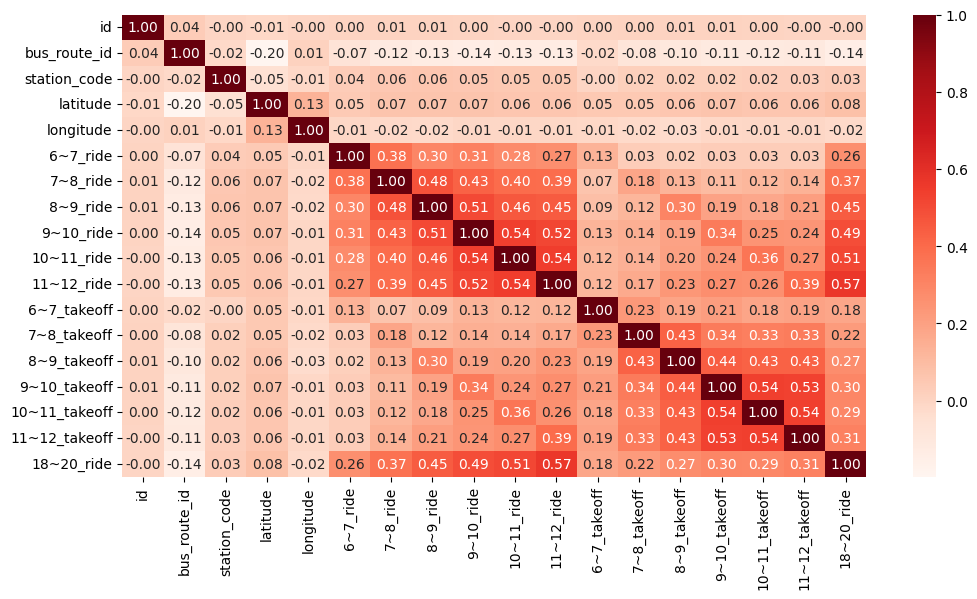

In [12]:
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, cmap="Reds", annot=True, fmt='.2f')

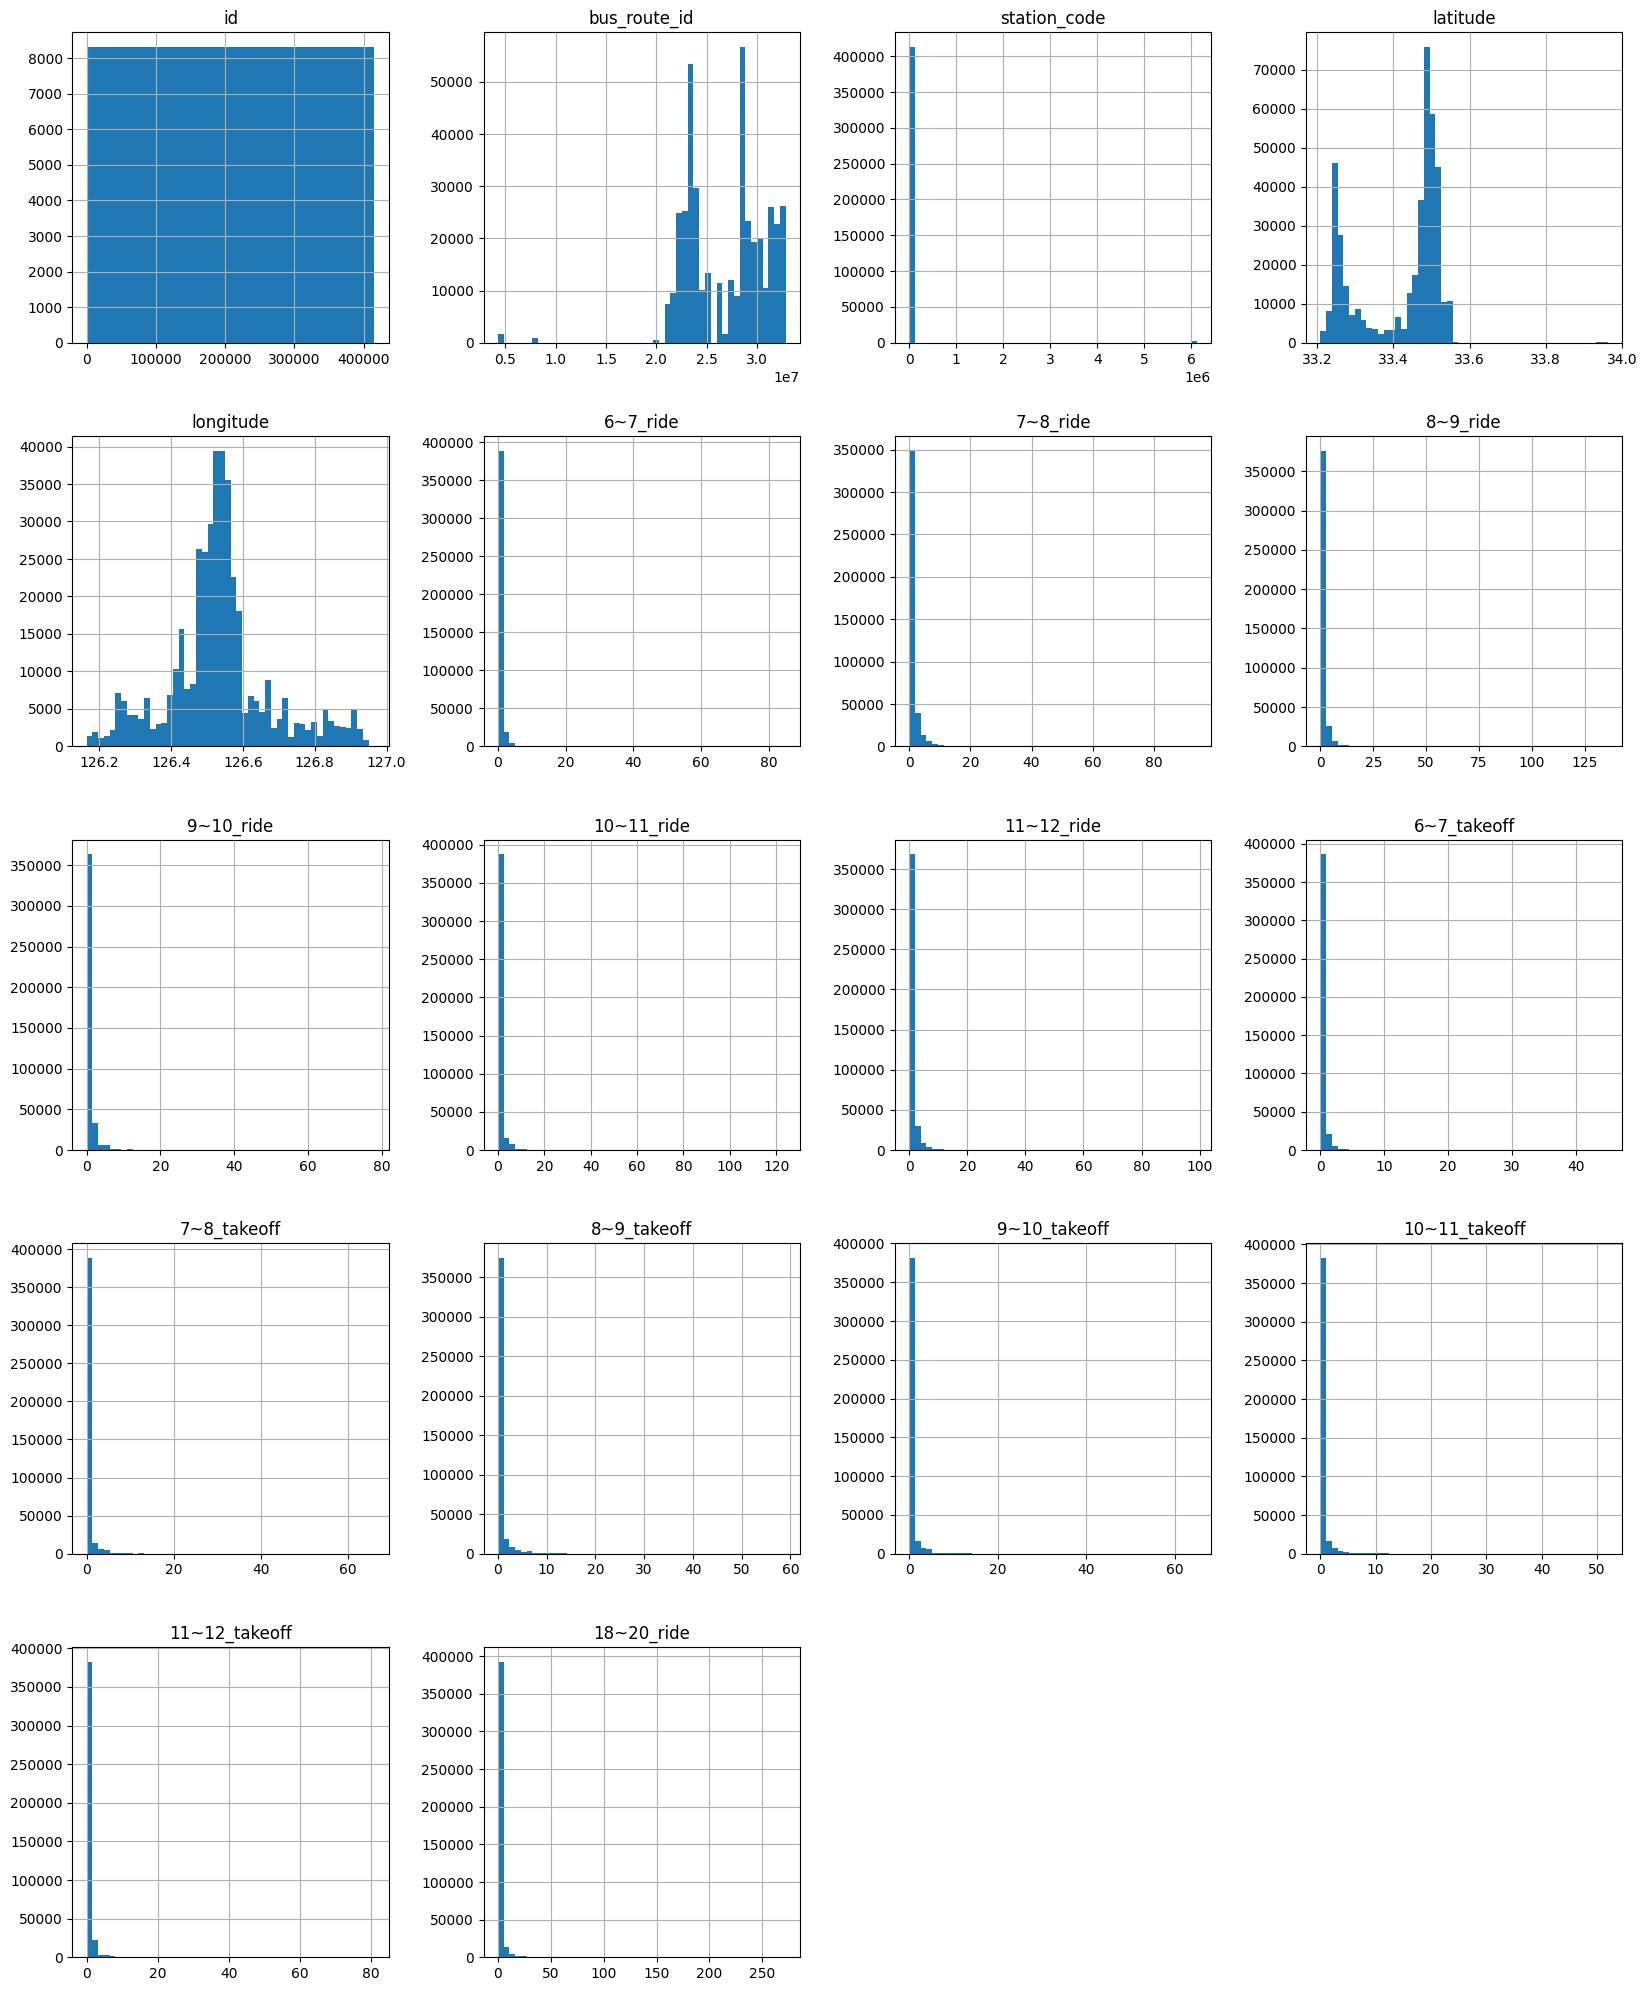

In [13]:
h = train.hist(bins=50, figsize=(20, 25))

In [14]:
# 범주화데이터 수치형으로 변환
in_bus = (train['in_out'] == '시내버스').astype(np.uint8)
in_bus

0         0
1         0
2         0
3         0
4         0
         ..
415418    0
415419    0
415420    0
415421    0
415422    0
Name: in_out, Length: 415423, dtype: uint8

# 데이터 시각화

In [15]:
train.head()

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,...,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride
0,0,2019-09-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,0.0,1.0,...,5.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2019-09-01,4270000,시외,357,한라병원,33.48944,126.48508,1.0,4.0,...,2.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,2,2019-09-01,4270000,시외,432,정존마을,33.48181,126.47352,1.0,1.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,3,2019-09-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,0.0,17.0,...,26.0,14.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0
4,4,2019-09-01,4270000,시내,1646,중문관광단지입구,33.25579,126.41260,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [16]:
# 퇴근 시간에 탑승률이 높은 정류장
train[['station_name','18~20_ride']].sort_values('18~20_ride', ascending=False)

,station_name,18~20_ride
190528,제주국제공항(구제주방면),272.0
330993,제주대학교,265.0
46048,제주대학교,245.0
129203,제주대학교,241.0
234231,제주대학교,240.0
...,...,...
161140,솔동산입구,0.0
161138,구삼일금고,0.0
161136,고향모루,0.0
161135,서년듸,0.0


- user_category 를 pie chart로 표현 <br>
  (01-일반, 02-어린이, 04-청소년, 06-경로, 27-장애 일반, 28-장애 동반, 29-유공 일반, 30-유공 동반)

In [17]:
len(bus_bts)

2409414

In [18]:
len(bus_bts['user_card_id'].unique())

326776

In [19]:
pd.unique(bus_bts['user_category'])

array([ 1,  4,  6,  2, 29, 28, 27, 30], dtype=int64)

<AxesSubplot:xlabel='user_category', ylabel='count'>

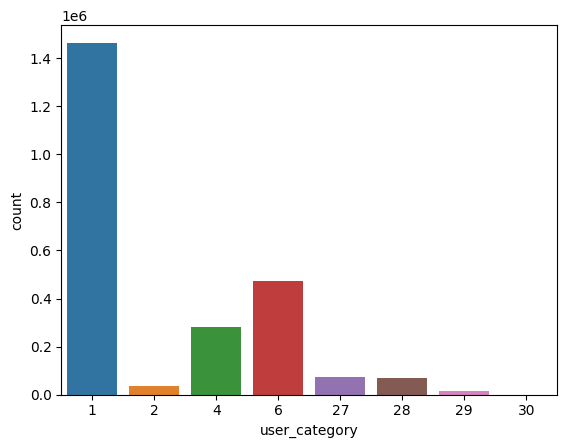

In [20]:

df = pd.read_csv("bus_bts.csv")
sns.countplot(x=df["user_category"])

In [21]:
# 유일한 'user_card_id' 값 추출
userCardId = bus_bts['user_card_id'].unique()
userCardId

array([1.01001013e+15, 1.01001010e+15, 1.01916003e+15, ...,
       4.09216029e+15, 1.04000992e+15, 1.04011013e+15])

In [22]:
# 유일한 'user_card_id' 값을 포함한 데이터 출력
unique_data = df.drop_duplicates(subset=['user_card_id'])
unique_data

,user_card_id,bus_route_id,vhc_id,geton_date,geton_time,geton_station_code,geton_station_name,getoff_date,getoff_time,getoff_station_code,getoff_station_name,user_category,user_count
0,1.010010e+15,23000000,149793674,2019-09-10,06:34:45,360,노형오거리,2019-09-10,07:10:31,592.0,화북초등학교,1,1
1,1.010010e+15,23000000,149793674,2019-09-10,06:34:58,360,노형오거리,2019-09-10,06:56:27,3273.0,고산동산(광양방면),1,1
2,1.019160e+15,21420000,149793535,2019-09-10,07:19:07,2495,동광환승정류장4(제주방면),2019-09-10,07:40:29,431.0,정존마을,4,1
3,1.019150e+15,21420000,149793512,2019-09-09,09:14:47,3282,대정환승정류장(대정읍사무소),2019-09-09,10:02:46,431.0,정존마을,1,1
4,1.010010e+15,21420000,149793512,2019-09-09,09:28:53,2820,삼정지에듀,2019-09-09,10:21:37,2972.0,제주국제공항(종점),4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2409317,5.365101e+15,23620000,149797095,2019-10-16,10:14:31,443,제주한라대학교,NaN,NaN,NaN,NaN,1,1
2409329,5.365101e+15,31480000,149793434,2019-10-16,09:43:45,537,진평연립입구,NaN,NaN,NaN,NaN,1,1
2409350,4.092160e+15,23220000,149797049,2019-10-16,10:40:49,9,노형우체국,NaN,NaN,NaN,NaN,1,1
2409355,1.040010e+15,23250000,149797049,2019-10-16,08:15:10,367,대기고등학교,NaN,NaN,NaN,NaN,1,1


In [23]:
# 이용 고객별 비율

u = unique_data['user_card_id'].count()

# 01-일반 
Adult =  (bus_bts['user_category'] == 1).sum() / u * 100
#  02-어린이
child =  (bus_bts['user_category'] == 2).sum() / u * 100
# 04-청소년
stu =  (bus_bts['user_category'] == 4).sum() / u* 100
# 06-경로
old =  (bus_bts['user_category'] == 6).sum() / u* 100
# 27-장애 일반
obstacle =  (bus_bts['user_category'] == 27).sum() / u* 100
# 28-장애 동반
with_obstacle =  (bus_bts['user_category'] == 28).sum() / u* 100
# 29-유공 일반
merit =  (bus_bts['user_category'] == 29).sum() / u* 100
# 30-유공 동반
with_merit =  (bus_bts['user_category'] == 30).sum() / u* 100

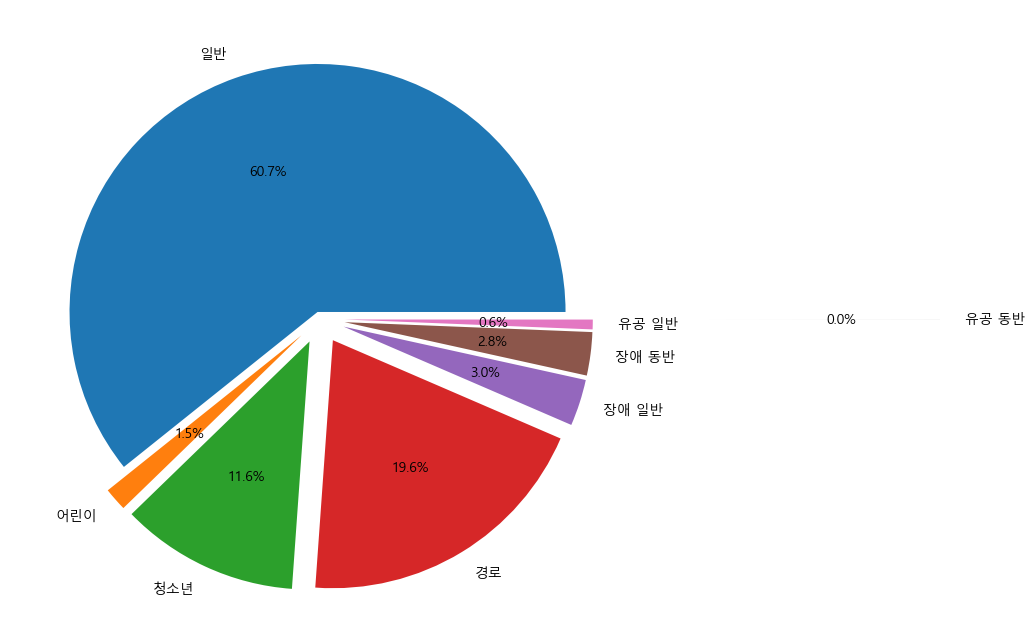

In [24]:
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # window
matplotlib.rcParams['font.size'] = 10 # 글자 크기

plt.figure(figsize=(8, 10))

# 수치값
ratio = [Adult, child, stu, old, obstacle, with_obstacle, merit, with_merit]
# 라벨
labels=['일반', '어린이', '청소년', '경로', '장애 일반', '장애 동반', '유공 일반', '유공 동반']
plt.pie(ratio, labels=labels, autopct='%.1f%%', explode=[0.03, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 1.5 ]) # explod : 간격 조정
plt.show()

**정류장별 승하차 인원수는?**
- 승차 인원이 많은 정류장은?

In [25]:
train.iloc[:,8:14]

,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride
0,0.0,1.0,2.0,5.0,2.0,6.0
1,1.0,4.0,4.0,2.0,5.0,6.0
2,1.0,1.0,0.0,2.0,0.0,0.0
3,0.0,17.0,6.0,26.0,14.0,16.0
4,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
415418,4.0,0.0,0.0,0.0,0.0,0.0
415419,4.0,0.0,0.0,0.0,0.0,0.0
415420,0.0,0.0,0.0,0.0,0.0,0.0
415421,1.0,0.0,0.0,0.0,0.0,0.0


In [26]:
df['ride_sum'] = (train.iloc[:,8:14]).sum(axis=1)

In [27]:
df['ride_sum']

0          16.0
1          22.0
2           4.0
3          79.0
4           0.0
           ... 
2409409     NaN
2409410     NaN
2409411     NaN
2409412     NaN
2409413     NaN
Name: ride_sum, Length: 2409414, dtype: float64